In [1]:
from graphviz import Digraph
from value import Value
from neuron import MLP

In [12]:
def trace(root):
    nodes, edges = set(), set()
    def build(v:Value):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child,v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR - left to right

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        dot.node(name = uid, label="{ %s | data %.4f | grad %.4f}" %(n.label, n.data, n.grad), shape='record')
        if n._op:
            dot.node(name = uid + n._op, label=n._op)
            dot.edge(uid + n._op, uid)
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    return dot

In [3]:
x = [1.0,2.0,-3.0]
nn = MLP(len(x),1,[4,4])
nn(x)

Value(0.9019631748238969, label=)

In [4]:
xs = [
    [2.0,3.0,-1.0],
    [3.0,-1.0,0.5],
    [0.5,1.0,1.0],
    [1.0,1.0,-1.0]
    ]
y = [1.0,-1.0,-1.0,-1.0]

ypred = [nn(x) for x in xs]
ypred


[Value(0.8051411368119258, label=),
 Value(0.3208598756541126, label=),
 Value(0.2588693516152761, label=),
 Value(0.7886404650183977, label=)]

In [5]:
def l2_loss(y,ypred):
    #return [(yi,ypred) for yi, ypred in zip(y,ypred)]
    return sum((ypred - yi)**2 for yi, ypred in zip(y,ypred))

In [13]:
loss = sum((ypred - yi)**2 for yi, ypred in zip(y,ypred))
loss

Value(6.528657568650493, label=)

In [14]:
loss.backward()

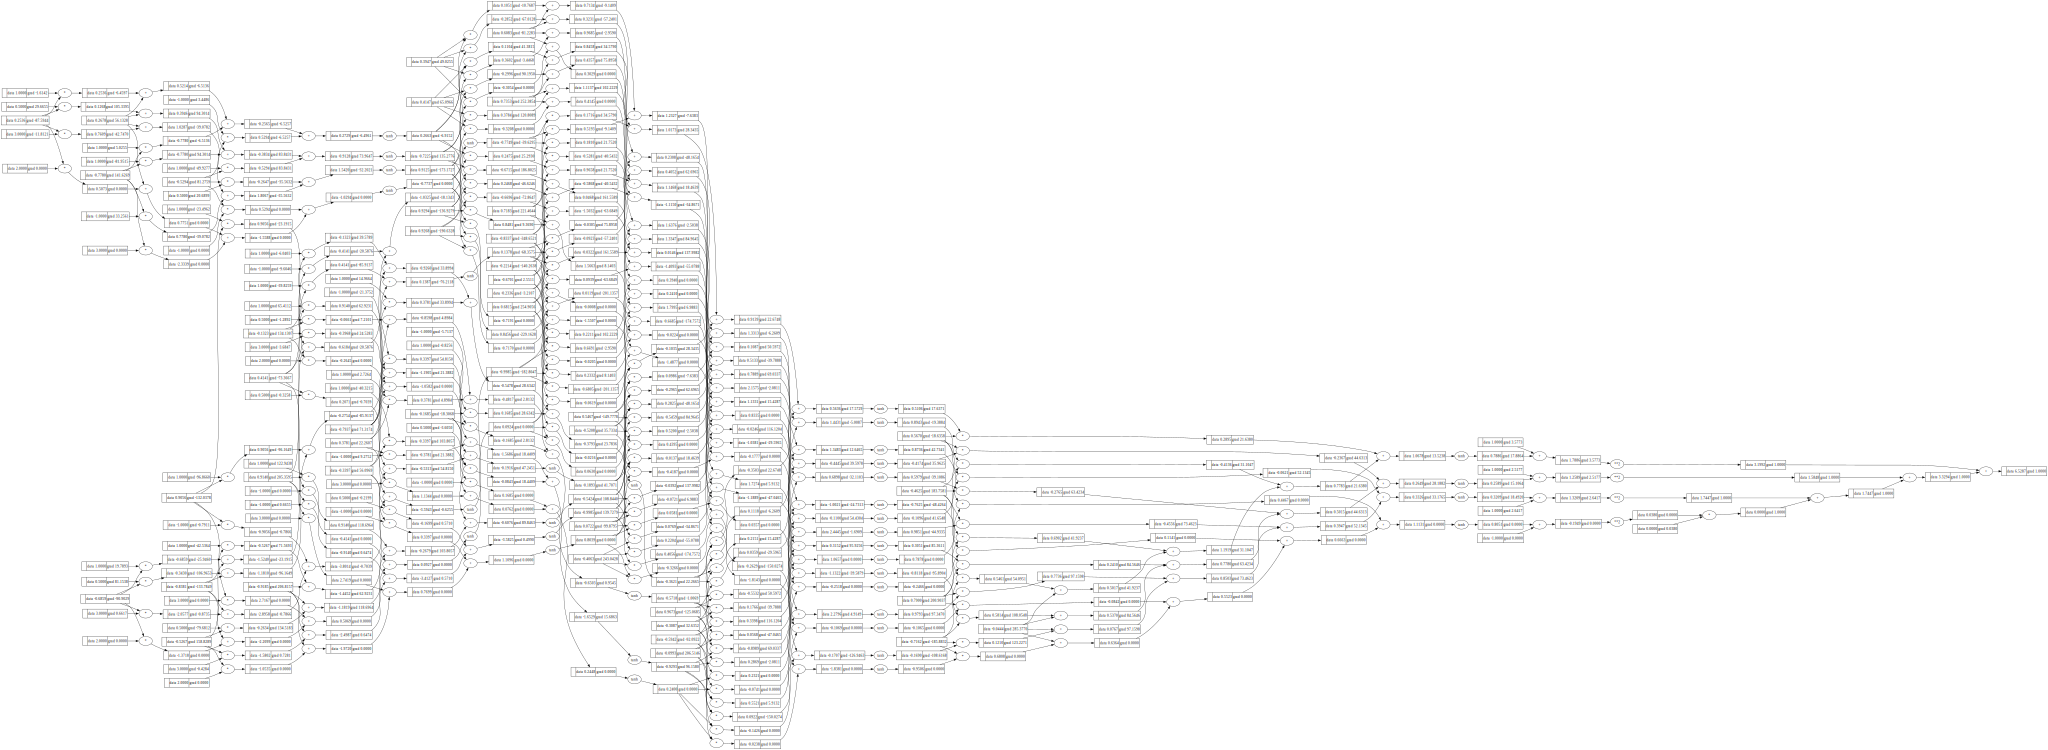

In [17]:
draw_dot(loss)

In [9]:
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

b = Value(6.881373587019, label='b')

x1w1 = x1*w1; x1w1.label='x1w1'
x2w2 = x2*w2; x2w2.label='x2w2'

x1w1x2w2 = x1w1+x2w2; x1w1x2w2.label='x1w1x2w2'

n = x1w1x2w2 + b; n.label='n'
o = n.tanh(); o.label='o'
o.grad=1.0
